<a href="https://colab.research.google.com/github/pinemoon01/Australian-Housing-Price/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%EA%B3%BC%EC%A0%9C_2016343_%EB%B0%95%EC%A7%80%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#데이터분석및활용 데이터분석 과제
#2016343 경영학과 박지현

In [ ]:
#목표: 다중선형회귀모형, 의사결정나무, 랜덤 포레스트 모델을 구축하여 정확성을 비교하고 정확성이 높은 모델을 선택할 것입니다.

# 먼저 데이터 전처리부터 합니다.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pd.set_option('display.float_format', lambda x: '%.3f' % x)# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory




In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#csv 데이터 가져오기
AU = pd.read_csv("/content/drive/My Drive/데분활/RealEstateAU_1000_Samples.csv", encoding='UTF-8')
AU

,index,TID,breadcrumb,category_name,property_type,building_size,land_size,preferred_size,open_date,listing_agency,...,state,zip_code,phone,latitude,longitude,product_depth,bedroom_count,bathroom_count,parking_count,RunDate
0,0,1350988,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added 2 hours ago,Professionals - DARWIN CITY,...,NT,800,08 8941 8289,NaN,NaN,premiere,2.000,1.000,1.000,2022-05-27 15:54:05
1,1,1350989,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Apartment,171m²,NaN,171m²,Added 7 hours ago,Nick Mousellis Real Estate - Eview Group Member,...,NT,800,0411724000,NaN,NaN,premiere,3.000,2.000,2.000,2022-05-27 15:54:05
2,2,1350990,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,NaN,NaN,NaN,Added 22 hours ago,Habitat Real Estate - THE GARDENS,...,NT,800,08 8981 0080,NaN,NaN,premiere,2.000,1.000,1.000,2022-05-27 15:54:05
3,3,1350991,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,House,NaN,NaN,NaN,Added yesterday,Ray White - NIGHTCLIFF,...,NT,800,08 8982 2403,NaN,NaN,premiere,1.000,1.000,0.000,2022-05-27 15:54:05
4,4,1350992,Buy>NT>DARWIN CITY,Real Estate & Property for sale in DARWIN CITY...,Unit,201m²,NaN,201m²,Added yesterday,Carol Need Real Estate - Fannie Bay,...,NT,800,0418885966,NaN,NaN,premiere,3.000,2.000,2.000,2022-05-27 15:54:05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,1351983,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,NaN,9.17ha,9.17ha,Under offer,United Realty NT - Parap,...,NT,834,08 8981 2666,NaN,NaN,feature,4.000,3.000,6.000,2022-05-27 15:54:05
996,996,1351984,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,203m²,600m²,600m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.000,2.000,2.000,2022-05-27 15:54:05
997,997,1351985,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,209.6m²,800m²,800m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,836,08 89834326,NaN,NaN,standard,4.000,2.000,2.000,2022-05-27 15:54:05
998,998,1351986,Buy>NT>DARWIN,"Real Estate & Property for sale in DARWIN, NT ...",House,180m²,450m²,450m²,NaN,Kassiou Constructions - HOWARD SPRINGS,...,NT,810,08 89834326,NaN,NaN,standard,4.000,2.000,3.000,2022-05-27 15:54:05


In [6]:
df = AU.drop( columns = ['TID', 'breadcrumb','category_name', 'preferred_size', 'open_date', 'zip_code', 'phone', 'latitude', 'longitude' ,'product_depth', 'RunDate', 'address', 'address_1'])
df.describe()

,index,location_number,bedroom_count,bathroom_count,parking_count
count,1000.000,1000.000,967.000,967.000,967.000
mean,499.500,147412522.866,2.867,1.739,2.152
std,288.819,61213814.676,1.152,0.636,1.515
min,0.000,108530451.000,0.000,1.000,0.000
25%,249.750,138659781.000,2.000,1.000,1.000
50%,499.500,139045835.000,3.000,2.000,2.000
75%,749.250,139304193.000,4.000,2.000,2.000
max,999.000,700199623.000,9.000,5.000,12.000


In [11]:
df.head()

,index,property_type,building_size,land_size,listing_agency,price,location_number,location_type,location_name,city,state,bedroom_count,bathroom_count,parking_count
26,26,Unit,340,340,Colliers International - Darwin,795.000,139277147,Buy,"$795,000",Darwin City,NT,3.000,3.000,4.000
42,42,House,81,81,Ray White City (NT) -,450.000,139095611,Buy,"$450,000",Darwin City,NT,1.000,1.000,1.000
88,88,Unit,80,92,Nick Mousellis Real Estate - Eview Group Member,580.000,138568447,Buy,"Offers Over $580,000",Darwin City,NT,2.000,2.000,2.000
153,153,Unit,92,92,No Agent Property - BRIGHTON EAST,280.000,134958294,Buy,"$280,000 to$300,000",Darwin City,NT,2.000,1.000,1.000
162,162,Unit,54,54,Raine & Horne - Darwin,200.000,130692394,Buy,"$200,000-$250,000",Darwin City,NT,1.000,1.000,1.000


In [16]:
#notnull을 사용해서 결측치가 아닌 값을 찾습니다 
df = df[pd.notnull(df['bedroom_count'])]
df = df[pd.notnull(df['building_size'])]
df = df[pd.notnull(df['land_size'])]
df = df[pd.notnull(df['price'])]



df['price'] = pd.to_numeric(df['price'])


df['building_size'] = pd.to_numeric(df['building_size'])

df['land_size'] = pd.to_numeric(df['land_size'])


df.head()

,index,property_type,building_size,land_size,listing_agency,price,location_number,location_type,location_name,city,state,bedroom_count,bathroom_count,parking_count
26,26,Unit,340,340,Colliers International - Darwin,795.000,139277147,Buy,"$795,000",Darwin City,NT,3.000,3.000,4.000
42,42,House,81,81,Ray White City (NT) -,450.000,139095611,Buy,"$450,000",Darwin City,NT,1.000,1.000,1.000
88,88,Unit,80,92,Nick Mousellis Real Estate - Eview Group Member,580.000,138568447,Buy,"Offers Over $580,000",Darwin City,NT,2.000,2.000,2.000
153,153,Unit,92,92,No Agent Property - BRIGHTON EAST,280.000,134958294,Buy,"$280,000 to$300,000",Darwin City,NT,2.000,1.000,1.000
162,162,Unit,54,54,Raine & Horne - Darwin,200.000,130692394,Buy,"$200,000-$250,000",Darwin City,NT,1.000,1.000,1.000


In [21]:
#필요없는 열을 제거합니다 
df1 = df.drop( columns = ['index','property_type', 'listing_agency','location_type','location_name', 'city','state'])
df1.head()              

,building_size,land_size,price,location_number,bedroom_count,bathroom_count,parking_count
26,340,340,795.000,139277147,3.000,3.000,4.000
42,81,81,450.000,139095611,1.000,1.000,1.000
88,80,92,580.000,138568447,2.000,2.000,2.000
153,92,92,280.000,134958294,2.000,1.000,1.000
162,54,54,200.000,130692394,1.000,1.000,1.000


/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x432 with 0 Axes>

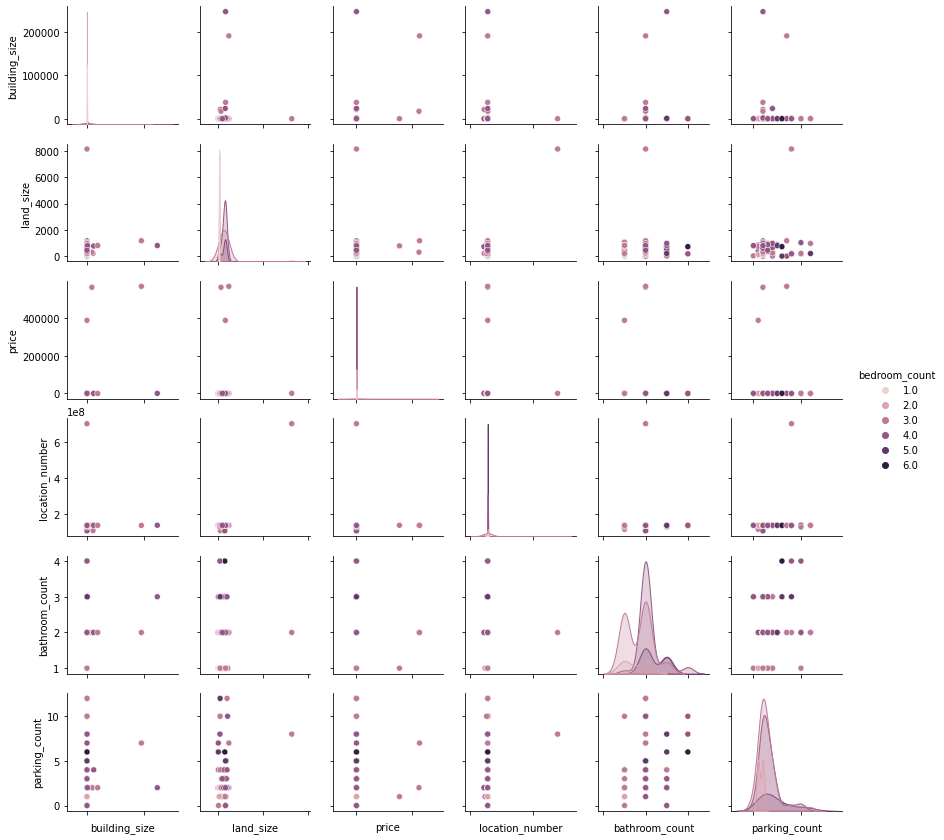

In [22]:
#Data visualization using seaborn
#linear regression
plt.figure(figsize=(10,6))
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(df1[['building_size','land_size','price','location_number','bedroom_count','bathroom_count','parking_count']]
                 ,hue='bedroom_count',size=2)
g.set(xticklabels=[])

In [32]:
#X = df1.iloc[:,1:].values
#y = df1.iloc[:,0].values

#침실 개수를 기준으로 빌딩 크기, 땅 크기, 가격을 분석합니다. 
X = df1[['building_size','land_size','price','bedroom_count']]
y = df1['bedroom_count']

In [33]:
#Splitting the data into train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix

In [36]:
#다중선형회귀모형
mlr = LinearRegression()
mlr.fit(X_train,y_train)
mlr_score = mlr.score(X_test,y_test)
pred_mlr = mlr.predict(X_test)
expl_mlr = explained_variance_score(pred_mlr,y_test)

In [35]:
#의사결정나무
tr_regressor = DecisionTreeRegressor(random_state=0)
tr_regressor.fit(X_train,y_train)
tr_regressor.score(X_test,y_test)
pred_tr = tr_regressor.predict(X_test)
decision_score=tr_regressor.score(X_test,y_test)
expl_tr = explained_variance_score(pred_tr,y_test)

In [37]:
#랜덤포레스트 
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [38]:
print("Multiple Linear Regression Model Score is ",round(mlr.score(X_test,y_test)*100))
print("Decision tree  Regression Model Score is ",round(tr_regressor.score(X_test,y_test)*100))
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

#이제 이 세 모델을 비교합니다 

models_score =pd.DataFrame({'Model':['Multiple Linear Regression','Decision Tree','Random forest Regression'],
                            'Score':[mlr_score,decision_score,rf_score],
                            'Explained Variance Score':[expl_mlr,expl_tr,expl_rf]
                           })
models_score.sort_values(by='Score',ascending=False)

Multiple Linear Regression Model Score is  100
Decision tree  Regression Model Score is  97
Random Forest Regression Model Score is  97


,Model,Score,Explained Variance Score
0,Multiple Linear Regression,1.000,1.000
1,Decision Tree,0.974,0.972
2,Random forest Regression,0.973,0.971


In [ ]:
#결과: 